<a href="https://colab.research.google.com/github/lungnahahd/Tensorflow_Prac/blob/main/AzureCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print('Hello world')

Hello world


In [ ]:
import requests
import json
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

In [ ]:
# 내 계정 Key 값
subscription_key = "계정 key 값 입력"

In [ ]:
# 내 계정 vision 주소 
vision_base_url = "엔드포인트 주소 입력/vision/v2.0/"

In [ ]:
# 최종적으로 호출할 주소가 완성 
analyze_url = vision_base_url + "analyze"

In [ ]:
# 분석에 활용될 이미지 주소(인터넷에 있는 사진을 이용할 경우는 이미지 주소를 복사해서 사용하기)
image_url = "https://img.hankyung.com/photo/202105/AA.26251517.1.jpg"

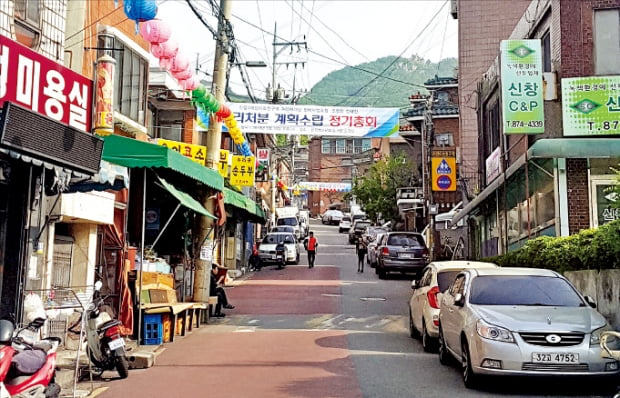

In [ ]:
# 이미지를 주소에서 잘 불러왔는지 확인하는 코드
# 가끔 주소 자체에서 이미지를 차단하는 경우도 있으니 주의!
image = Image.open(BytesIO(requests.get(image_url).content))
image

In [ ]:
# 정보들을 세팅하는 코드
headers = {'Ocp-Apim-Subscription-Key': subscription_key }
params  = {'visualFeatures': 'Categories,Description,Color'}
data    = {'url': image_url}

In [ ]:
# 실제로 클라우드에 요청하고 결과를 받는 코드 !!!
# 결과는 response 변수에 담겨 있음
response = requests.post(analyze_url, headers=headers, params=params, json=data)
response.raise_for_status()

In [ ]:
# 분석 결과를 확인
## 아래 나오는 confidence가 정확도를 의미!! -> 이를 기준으로 성능 평가 가능
## description 이 간단하게 설명
### 아래 나오는 것들은 인식한 결과들을 차례로 보여줌
analysis = response.json()
analysis

{'categories': [{'detail': {'landmarks': []},
   'name': 'outdoor_',
   'score': 0.00390625},
  {'detail': {'landmarks': []}, 'name': 'outdoor_street', 'score': 0.390625}],
 'color': {'accentColor': 'B41735',
  'dominantColorBackground': 'Grey',
  'dominantColorForeground': 'Grey',
  'dominantColors': ['Grey', 'White'],
  'isBWImg': False,
  'isBwImg': False},
 'description': {'captions': [{'confidence': 0.9627072926055779,
    'text': 'a close up of a busy city street'}],
  'tags': ['outdoor',
   'building',
   'road',
   'street',
   'car',
   'sidewalk',
   'city',
   'walking',
   'traffic',
   'woman',
   'man',
   'parked',
   'sitting',
   'truck',
   'people',
   'busy',
   'food',
   'filled',
   'table',
   'sign',
   'driving',
   'riding',
   'standing',
   'store',
   'group',
   'holding',
   'motorcycle',
   'umbrella']},
 'metadata': {'format': 'Jpeg', 'height': 398, 'width': 620},
 'requestId': '49a6c289-66ac-4575-8980-b653576cf7a8'}

In [ ]:
# 결과를 활용
image_caption = analysis["description"]["captions"][0]["text"].capitalize()
image_caption

'A close up of a busy city street'